# RR_LYRAE Dataset Analysis and Implementation of Machine Learning Algorithms
First step involves importing essential python libaries. We will be analyzing the dataset by extracting it in frames with the help of pandas. We will then be plotting our data using matplotlib and seaborn for statistical visualizations. We have divided our notebook into two segments. The first segment will deal with analysis of Dataset and the second segment will deal with implementing various classifiers and testing their efficiencies through ROC graph.

### About RR_Lyrae 


RR Lyraes are pulsating horizontal branch aging stars of spectral class A or F, with a mass of around half the Sun's. They are thought to have previously shed mass during the Red-giant branch phase, and consequently, they were once stars with similar or slightly less mass than the Sun, around 0.8 solar masses.

                                          Algorithms used 
1.Decision Tree
2.SVM
3.Linear Discriminator
4.K-Neighbours
5.Logistic Regression
6.Naive Bayes 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import completeness_contamination
from astroML.utils import split_samples
from astroML.plotting import setup_text_plots

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression




## 1. Analyzing the Dataset

Let's define the text properties.

In [2]:
setup_text_plots(fontsize=8, usetex=True)

We import the data and split it the samples into training and test sets. We will be using dataframe attribute of pandas. 

In [3]:
X, y = fetch_rrlyrae_combined()
xd = pd.DataFrame(data=X)
yd = pd.DataFrame(data=y)
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25], random_state=1)

Our data is now in a tabular format

In [4]:
print(xd)

              0         1         2         3
0      1.250999  0.394000  0.137000  0.061999
1      1.048000  0.339001  0.151999  0.023001
2      1.008001  0.341999  0.129000  0.203001
3      0.965000  0.392000  0.149000  0.150000
4      1.040001  0.333000  0.125999  0.101999
5      1.154001  0.373999  0.145000  0.121000
6      0.965000  0.384001  0.118999  0.011000
7      1.015001  0.370998  0.158001  0.091999
8      1.003000  0.391001  0.145000  0.074999
9      0.948000  0.330000  0.164000  0.021000
10     1.020000  0.389999  0.168001  0.070999
11     0.997999  0.381001  0.143999  0.092001
12     0.882000  0.390999  0.130001  0.156000
13     0.851000  0.289000  0.106001  0.028999
14     0.985001  0.392000  0.147999  0.048000
15     0.914000  0.329000  0.142000  0.077000
16     1.011999  0.339001  0.166000  0.101999
17     0.864000  0.372000  0.176001  0.070000
18     1.035000  0.373001  0.191999  0.073999
19     1.008999  0.353001  0.184000 -0.060001
20     0.955000  0.393000  0.10400

In [5]:
print(yd)

         0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
...    ...
93111  1.0
93112  1.0
93113  1.0
93114  1.0
93115  1.0
93116  1.0
93117  1.0
93118  1.0
93119  1.0
93120  1.0
93121  1.0
93122  1.0
93123  1.0
93124  1.0
93125  1.0
93126  1.0
93127  1.0
93128  1.0
93129  1.0
93130  1.0
93131  1.0
93132  1.0
93133  1.0
93134  1.0
93135  1.0
93136  1.0
93137  1.0
93138  1.0
93139  1.0
93140  1.0

[93141 rows x 1 columns]


We will be plotting our data on a scatterplot which will give us an idea about two labels of stars and rr lyrae stars. 

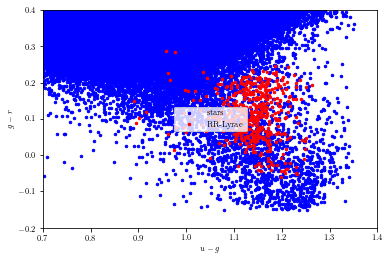

In [6]:
stars = (y == 0)
rrlyrae = (y == 1)
ax = plt.axes()

ax.plot(X[stars, 0], X[stars, 1], '.', ms=5, c='b', label='stars')
ax.plot(X[rrlyrae, 0], X[rrlyrae, 1], '.', ms=5, c='r', label='RR-Lyrae')

ax.legend(loc=10)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.set_xlim(0.7, 1.4)
ax.set_ylim(-0.2, 0.4)

plt.show()



Using seaborn library, we have various subplots explaining distribution of various frequencies and time domains. These subplots pertain to RR Lyrae type 1,2,3 and Normal star 0. 

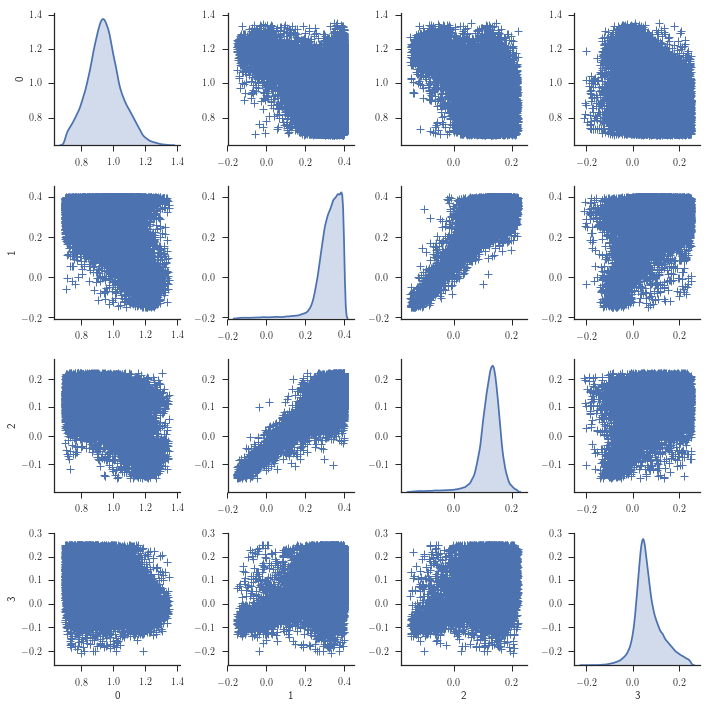

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(xd, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))
plt.show()

The following lines will generate a visualization of density of stars in specific ranges. 

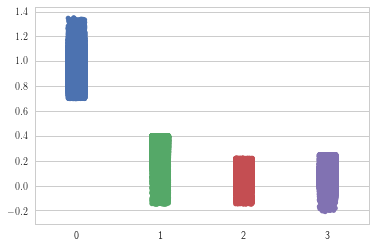

In [11]:
sns.set(style="whitegrid", color_codes=True)
sns.stripplot( data=xd, jitter=True)
plt.show()

The following line of code will generate a visualization of distribution of our y dataset.

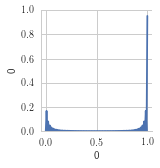

In [13]:
sns.pairplot(yd, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))
plt.show()

## 2. Implementing Machine Learning Algorithms

#### 1. Decesion Tree Algorithm

In [16]:
clf = DecisionTreeClassifier(random_state=1, criterion='entropy')


We fit our data to train the decision tree using X_train and y_train


In [17]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

We will generate a prediction score for our decesion tree classifier

In [18]:
y_out = clf.predict(X_test)
clf.predict_proba(X_test, check_input=True)



array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

We will be generating false positive and false negative for cross-validation

In [19]:
tot_neg = np.sum(y_test == 0)
tot_pos = np.sum(y_test == 1)

fn = np.sum((y_test == 1) & (y_out == 0))
tn = np.sum((y_test == 0) & (y_out == 0))

fp = np.sum((y_test == 0) & (y_out == 1))
tp = np.sum((y_test == 1) & (y_out == 1))

print( "----------------------------------------------------------------")
print ("partial training set: (%i non-variable, %i RR Lyrae)"
       % (np.sum(y_train == 0), np.sum(y_train == 1)))
print( "positive = RR Lyrae, negative = non-variable")
print ("false positives: %i (%.1f%%)" % (fp, fp * 100. / (fp + tp)))
print ("false negatives: %i (%.1f%%)" % (fn, fn * 100. / (fn + tn)))

----------------------------------------------------------------
partial training set: (69499 non-variable, 356 RR Lyrae)
positive = RR Lyrae, negative = non-variable
false positives: 65 (47.4%)
false negatives: 55 (0.2%)


Accuracy Score: 

In [20]:
clf.score(X_test,y_test)

0.99484668899768103

#### 2. Support Vector Machine

In [21]:
clf =SVC(random_state=1)
clf.fit(X_train, y_train) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
clf.score(X_test,y_test)

0.99454607918921245

In [23]:
print(clf.predict(X_test))

[ 0.  0.  0. ...,  0.  0.  0.]


#### 3. Linear Discriminant Analysis

In [24]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [25]:
clf.score(X_test, y_test)


0.97973031005754529

In [26]:
print(clf.predict(X_test))


[ 0.  0.  0. ...,  0.  0.  0.]


#### 4. K Nearest Neighbour

In [27]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
clf.score(X_test,y_test)


0.99639268229837674

In [29]:
print(clf.predict(X_test))

[ 0.  0.  0. ...,  0.  0.  0.]


#### 5. Naive Bayes

In [30]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [31]:
clf.score(X_test,y_test)

0.97801253972343893

In [32]:
print(clf.predict(X_test))


[ 0.  0.  0. ...,  0.  0.  0.]


#### 6. Logistic Regression

In [33]:
clf = LogisticRegression(fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)
clf.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
clf.score(X_test,y_test)

0.99454607918921245

In [35]:
print(clf.predict(X_test))

[ 0.  0.  0. ...,  0.  0.  0.]


We will now fit our training data to generate ROC curves for our classifiers

In [36]:
def compute_models(*args):
    names = []
    probs = []
    for classifier, kwargs in args:
        print (classifier.__name__)
        clf = classifier(**kwargs)
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]

        names.append(classifier.__name__)
        probs.append(y_probs)

    return names, probs

names, probs = compute_models(
                              (LDA, {}),
                              
                              (LogisticRegression,
                               dict(class_weight='balanced')),
                              (KNeighborsClassifier,
                               dict(n_neighbors=10)),
                              (DecisionTreeClassifier,
                               dict(random_state=0, max_depth=12,
                                    criterion='entropy')),
                              (GaussianNB, {})
    
                             )


LinearDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GaussianNB


We will test our classifier's efficiency in this segment

In [40]:
fig = plt.figure(figsize=(12, 8.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)



labels = dict(LinearDiscriminantAnalysis='LDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GaussianNB = 'GNB',
              LogisticRegression='LR'
              )



The slopes of K Nearest Neighbor 'KNN' and Decesion Tree 'DT' are a good fit and therefore, good classifiers for our data. However, the curves for Logistic Regression 'LR' and Linear Discriminant Analysis 'LDA' are quite steep.

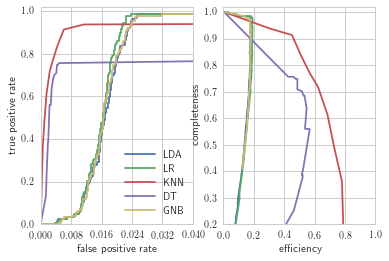

In [39]:
thresholds = np.linspace(0, 1, 1001)[:-1]
# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)
# iterate through and show results
for name, y_prob in zip(names, probs):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name])

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name])

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.02)

plt.show()